In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt=pd.read_csv(r'D:\Siba Studymaterial\OneDrive - kiit.ac.in\Desktop\Datasets\BitcoinHeistData.csv')

In [4]:
dt.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [5]:
dt.drop(["address"],axis=1, inplace = True)

In [6]:
dt.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [7]:
dt['label']=dt['label'].astype('category').cat.codes

In [8]:
dt.head()

,year,day,length,weight,count,looped,neighbors,income,label
0,2017,11,18,0.008333,1,0,2,100050000.0,26
1,2016,132,44,0.000244,1,0,1,100000000.0,27
2,2016,246,0,1.000000,1,0,2,200000000.0,26
3,2016,322,72,0.003906,1,0,2,71200000.0,26
4,2016,238,144,0.072848,456,0,1,200000000.0,27


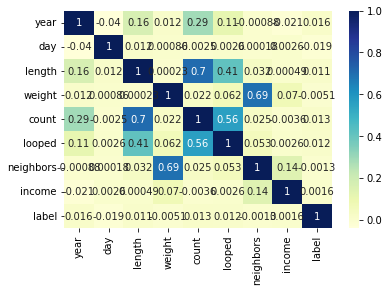

In [9]:
dataplot = sns.heatmap(dt.corr(), cmap="YlGnBu", annot=True)

In [10]:
dt.drop(["length","looped","weight","neighbors","day"],axis=1, inplace = True)

In [11]:
df=pd.read_csv(r'D:\Siba Studymaterial\OneDrive - kiit.ac.in\Desktop\Datasets\BitcoinHeistData.csv')

In [12]:
df.drop(["length","looped","neighbors","day"],axis=1, inplace = True)

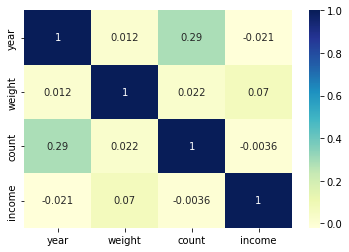

In [13]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

## Correlation is highest only between year and count that is 0.29

In [14]:
import sklearn.cluster as cluster

In [15]:
kmeans=cluster.KMeans(n_clusters=5,init="k-means++")
kmeans=kmeans.fit(df[['year','count','income','weight']])

In [16]:
kmeans.cluster_centers_

array([[2.01244233e+03, 3.77370661e+02, 9.03764010e+11, 7.32200432e+00],
       [2.01153571e+03, 3.66035714e+02, 4.55019122e+13, 7.80588862e+00],
       [2.01447722e+03, 7.21991649e+02, 2.47421965e+09, 5.34917930e-01],
       [2.01298333e+03, 1.33656667e+03, 1.17199852e+13, 5.79228613e+01],
       [2.01210663e+03, 3.88331412e+02, 4.07909979e+12, 2.67347004e+01]])

In [17]:
dt['Clusters']=kmeans.labels_

In [18]:
dt['Clusters'].value_counts()

2    2913584
0       2678
4        347
3         60
1         28
Name: Clusters, dtype: int64

In [29]:
K=range(1,10)
wss=[]
for k in K:##Within-cluster-sum of squared
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df[['year','count','income','weight']])
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [30]:
mycenters=pd.DataFrame({'Clusters':K,'WSS':wss})
mycenters

,Clusters,WSS
0,1,7.719538e+28
1,2,1.894574e+28
2,3,8.186422e+27
3,4,4.693266e+27
4,5,3.060403e+27
5,6,2.188803e+27
6,7,1.682172e+27
7,8,1.384164e+27
8,9,1.107237e+27


<Axes: xlabel='Clusters', ylabel='WSS'>

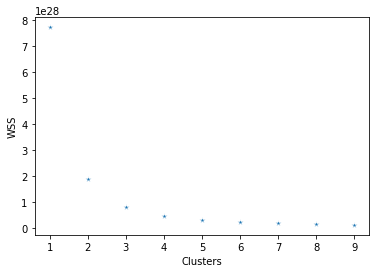

In [31]:
sns.scatterplot(x='Clusters',y='WSS',data=mycenters,marker="*")

In [32]:
K=range(1,20)
wss=[]
for k in K:##Within-cluster-sum of squared
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df[['year','count','income','weight']])
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [33]:
mycenters=pd.DataFrame({'Clusters':K,'WSS':wss})
mycenters

,Clusters,WSS
0,1,7.719538e+28
1,2,1.894574e+28
2,3,8.186422e+27
3,4,4.693266e+27
4,5,3.060403e+27
5,6,2.188803e+27
6,7,1.682172e+27
7,8,1.381306e+27
8,9,1.107265e+27
9,10,8.613928e+26


<Axes: xlabel='Clusters', ylabel='WSS'>

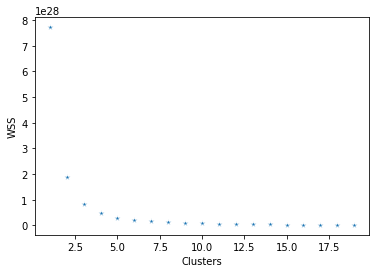

In [37]:
sns.scatterplot(x='Clusters',y='WSS',data=mycenters,marker="*")

In [20]:
K=range(1,30)
wss=[]
for k in K:##Within-cluster-sum of squared
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df[['year','count','income','weight']])
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [21]:
mycenters=pd.DataFrame({'Clusters':K,'WSS':wss})
mycenters

,Clusters,WSS
0,1,7.719538e+28
1,2,1.894574e+28
2,3,8.186422e+27
3,4,4.693868e+27
4,5,3.060403e+27
5,6,2.188150e+27
6,7,1.685022e+27
7,8,1.381306e+27
8,9,1.110245e+27
9,10,8.613927e+26


<Axes: xlabel='Clusters', ylabel='WSS'>

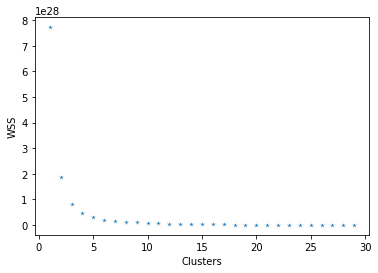

In [23]:
sns.scatterplot(x='Clusters',y='WSS',data=mycenters,marker="*")